<h1>Project 1: Investigate a Dataset </h1>
<p>In this project, I used 'tmdb_movies.csv' dataset.</p>
<h3>Tables of content</h3>
<ul>
<li> Questions</li>
<li>Data Discovery Phase</li>
<li>Data Wrangling Phase</li>
<li>Exploration Phase</li>
<li>Answers</li>
<li>Conculsions</li>
    </ul>
    

<h3> Questions:</h3>
<ol>
<li>What is the best movie?</li>
<li>Which movies have the largest profits?</li>
<li>Which movie has the lowest popularity?</li>
<li>What are the unique genres?</li>
</ol>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

<h2>Data Discovery Phase</h2>

In [2]:
# Reading the dataset.
df = pd.read_csv('tmdb-movies.csv')
# The shape of the dataframe
print('The dataframe shape is ',df.shape)
# The dataset information
df.info()

The dataframe shape is  (10866, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-nul

In [3]:
# Show the first 5 rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<h2>Wrangling Phase</h2>

<h4>1. Change Data Format</h4>

In [4]:
# convert the 'Date' column to datetime format
df['release_date']= pd.to_datetime(df['release_date'])
 
# Check the format of 'Date' column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

<h4>2. Remove Duplicate rows</h4>

In [5]:
# Check for duplicates in the data
sum(df.duplicated())

1

In [6]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [7]:
# Confirm correction by rechecking for duplicates in the data
sum(df.duplicated())

0

In [8]:
# Check the numbers of null value
df.isnull().sum().sort_values(ascending=False)

homepage                7929
tagline                 2824
keywords                1493
production_companies    1030
cast                      76
director                  44
genres                    23
imdb_id                   10
overview                   4
popularity                 0
budget                     0
revenue                    0
original_title             0
revenue_adj                0
budget_adj                 0
runtime                    0
release_date               0
vote_count                 0
vote_average               0
release_year               0
id                         0
dtype: int64

<h4>3. Split words</h4>

In [9]:
# Remove the delimater
def seprate_column_words(column_name):
    return df[column_name].str.split('|', expand = False)
df['cast'] = seprate_column_words('cast')
df['genres'] = seprate_column_words('genres')
df['production_companies'] = seprate_column_words('production_companies')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<h4>4. Remove Unused Columns</h4>

In [10]:
# Drop columns have nan values and I won't use them to answering my Question
df_nona =df.drop(['homepage','tagline','keywords'], 1)

In [11]:
# Fill othoer columns production_companies, cast, director, genres, imdb & overview
nan_replacements = {'production_companies':'Unknown','cast':'Unknown','director':'Unknown',
                    'genres':'Unknown','overview':'Unknown'}
df_clean = df_nona.fillna(nan_replacements)

<h4>5. Discard Rows</h4>

In [12]:
# Removes rows that have zer values
def removes_rows(column_name):
    return df_clean[df_clean[column_name] != 0]
                    
budget = removes_rows("budget")
budget_adj = removes_rows("budget_adj")
revenue = removes_rows('revenue')
revenue_adj = removes_rows('revenue_adj')
df_clean = df_clean.dropna() 

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10855 non-null  int64         
 1   imdb_id               10855 non-null  object        
 2   popularity            10855 non-null  float64       
 3   budget                10855 non-null  int64         
 4   revenue               10855 non-null  int64         
 5   original_title        10855 non-null  object        
 6   cast                  10855 non-null  object        
 7   director              10855 non-null  object        
 8   overview              10855 non-null  object        
 9   runtime               10855 non-null  int64         
 10  genres                10855 non-null  object        
 11  production_companies  10855 non-null  object        
 12  release_date          10855 non-null  datetime64[ns]
 13  vote_count      

In [13]:
# Confirm that no empty cell
df_clean.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [14]:
#The DataFrame describtion
df_clean.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10855.000000,10855.000000,1.085500e+04,1.085500e+04,10855.000000,10855.000000,10855.000000,10855.000000,1.085500e+04,1.085500e+04
mean,65959.191617,0.646832,1.463776e+07,3.986359e+07,102.105205,217.584155,5.973865,2001.313128,1.756606e+07,5.141632e+07
std,92018.246342,1.000591,3.092533e+07,1.170559e+08,31.348734,575.877532,0.934604,12.815672,3.431919e+07,1.446965e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10591.500000,0.207733,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20618.000000,0.383998,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75393.500000,0.714446,1.500000e+07,2.404727e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.374346e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<h2>Step 3: Answers</h2>

<h3>Q1: What is the best movie?</h3>

Text(0, 0.5, 'frequency')

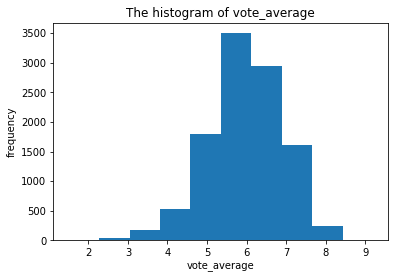

In [15]:
# Plot distribution of vote_average
df_clean['vote_average'].plot(kind='hist')
# title
plt.title("The histogram of vote_average")
# x label
plt.xlabel("vote_average")
#  y label
plt.ylabel("frequency")

<h4>Based on this figure:</h4>
<p>Although there are movies with have the highest vote-average which had low vote_count.</p> 

In [16]:
# Get the best movie which the highest voting
best_movie = df_clean['vote_average'].max()     # The highest vote_average
best_movie_ind = df_clean[['vote_average']].idxmax()    # it's index
best_movie_name = df_clean['original_title'][best_movie_ind].tolist()    # it's name
print('The best_movie title is: "', best_movie_name[0],'"')

The best_movie title is: " The Story of Film: An Odyssey "


<h3>Q2: Which movies have the largest profits?</h3>

Text(0, 0.5, 'revenue_adj')

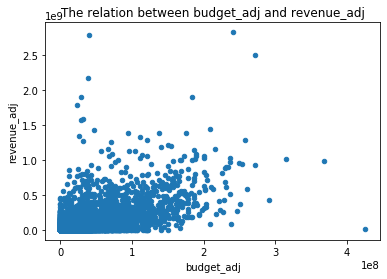

In [17]:
# Plot the relationship between budget_adj and revenue_adj
df_clean.plot(x = 'budget_adj', y = 'revenue_adj', kind = 'scatter');
# title
plt.title("The relation between budget_adj and revenue_adj")
# x label
plt.xlabel("budget_adj")
#  y label
plt.ylabel("revenue_adj")

<h4>Based on this figure:</h4>
<p>There is still no pattern observed.</p>

In [18]:
# Compute the largest 5 gross_profits
l_mov_revenue = df_clean.nlargest(5,['revenue_adj'])        # The largest 5 revenue
l_gross_profits = l_mov_revenue['revenue_adj'] - l_mov_revenue['budget_adj']   # The largest 5 gross_profits  
l_gross_profits = l_gross_profits.values.tolist()          # Store the gross_profits in list
l_titles = l_mov_revenue['original_title'].values.tolist()         # Store The titles of largest 5 gross_profits

In [19]:
# Display the profit for each movie
for i in range(5):
    print(l_titles[i],'is earned',l_gross_profits[i],'$')

Avatar is earned 2586236847.524277 $
Star Wars is earned 2750136650.919176 $
Titanic is earned 2234713671.205051 $
The Exorcist is earned 2128035624.5693455 $
Jaws is earned 1878643093.7113247 $


<h3>Q3: Which movie has the lowest popularity?</h3>

Text(0, 0.5, 'revenue_adj')

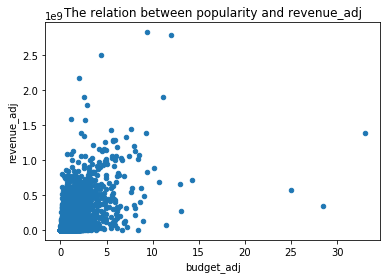

In [20]:
# Plot the relationship between popularity and revenue_adj
df_clean.plot(x = 'popularity', y = 'revenue_adj', kind = 'scatter');
# title
plt.title("The relation between popularity and revenue_adj")
# x label
plt.xlabel("budget_adj")
#  y label
plt.ylabel("revenue_adj")

<h4>Based on this figure</h4>
<p>Popular movies not had to mean higher revenue</p>

In [21]:
# Get the movie title which the lowest popularity
lp_movie = df_clean['popularity'].min()     # The lowest popularity
lp_movie_ind = df_clean[['popularity']].idxmax()    # it's index
lp_movie_name = df_clean['original_title'][lp_movie_ind].tolist()    # it's name
lp_movies_revenue = df_clean['revenue'][lp_movie_ind].tolist()        # it's revenue
print('The lowest_movie_popularity_title is: "', lp_movie_name[0],'" and earned',lp_movies_revenue[0],'$')

The lowest_movie_popularity_title is: " Jurassic World " and earned 1513528810 $


<h3>Q4: What are the unique genres?</h3>

In [22]:
# Grt the unique genrs
unique_genres = df_clean["genres"].explode().unique()
print('The unique genres are: ')
for i in range(len(unique_genres)):
    if(unique_genres[i] != 'Unknown'):
        print(unique_genres[i])

The unique genres are: 
Action
Adventure
Science Fiction
Thriller
Fantasy
Crime
Western
Drama
Family
Animation
Comedy
Mystery
Romance
War
History
Music
Horror
Documentary
TV Movie
Foreign


<h2>Step 4: Conculsions and Limitayions</h2>

<h5>Conclusion</h5> 
<p>After performing all the analysis if we want to make any profitable and successful Movie we will use the following formulas as:</p>
    <p><b>Budget:</b> Budget of the movie should be around 64.78 million.</p>
    <p><b>Runtime:</b> Runtime of the movie should be around 102.15 minutes.</p>
<h5>Limitations</h5>
<p>By following above formula we have a high probability of making a profitable and successful movie but it's not completely true as data provided might have some errors and as we have seen in our exploration the bug, and revenue column had many erroneous zero values which would have definitely affected our analysis whereas draping rows with missing values could have an effect on our overall analysis.</p>